# Sequential Learning

The goal of this notebook is to successfully update a prior distribution for our linear regression coefficients with each addition of a data point. This can easily be generalized to linear basis function models by replacing $x_{i}$ with $\phi (x_{i})$.

In [235]:
import numpy as np
import matplotlib.pyplot as plt

Remember that for linear regression models, we assume that our target values $t_{i} = y(\textbf{x}, \textbf{w}) + \epsilon$, where $y(\textbf{x}, \textbf{w}) = \textbf{w}^T\textbf{x}$ for $w = (w_{0}, w_{1}, ... , w_{D})$ and $x = (x_{0}, x_{1}, ... , x_{D})$.

Since $\epsilon \sim N(0, \beta^{-1})$, we can write the distribution of $t_{i}$ as 
$$p(t|\textbf{x}, \textbf{w}, \beta) = N(t|y(\textbf{x}, \textbf{w}), \beta^{-1})$$ 

Further assuming that our $t_{i}$'s are i.i.d., we can write the distribution of $\textbf{t} = (t_{1}, t_{2}, ... , t_{N})$ as 
$$ p(\textbf{t}|\textbf{X}, \textbf{w}, \beta) = {\displaystyle \prod_{n=1}^{N}} N(t_{n}|\textbf{w}^T\textbf{x}_{n}, \beta^{-1})$$

We are taking a Bayesian approach to linear regression, and considering a zero mean and isotropic distribution of $w$, we can also write the distribution of $w$ as the following:
$$ p(\textbf{w}) = N(\textbf{w}|\textbf{m}_{0}, \textbf{S}_{0}) = N(\textbf{w}|0, \alpha^{-1}I)$$
where $\alpha$ is a constant.

This prior is Gaussian, and so the posterior will also be Gaussian:
$$ p(\textbf{w}|\textbf{t}) = N(\textbf{w}|\textbf{m}_{N}, \textbf{S}_{N})$$
where 
$$\textbf{m}_{N} = \textbf{S}_{N}(\textbf{S}_{0}^{-1}\textbf{m}_{0} + \beta \Phi^T \textbf{t}) = \beta \textbf{S}_{N} \Phi^T \textbf{t}$$
$$\textbf{S}_{N}^{-1} = \textbf{S}_{0}^{-1} + \beta \Phi^T \Phi = \alpha I + \beta \Phi^T \Phi$$

It is important to note that $\Phi$ and $\textbf{t}$ contain all the data and target values, so the whole dataset must be kept for each iteration.

Working in 2D, our $x_{i}$'s will be scalars and $w = (w_{0}, w_{1})$ such that $t_{i} = w_{0} + w_{1}x_{1}$. To simulate a dataset we can sample our $x_{i}$'s and $\epsilon_{i}$'s from univariate Gaussian distributions.

(-5, 25)

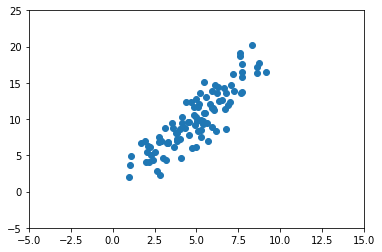

In [265]:
dim = 2

mu = 5
sigma = 2
numpoints = 100

epsmu = 0
beta = 2

x = np.array([np.random.normal(loc = mu, scale = sigma, size = numpoints)])
eps = np.array([np.random.normal(loc = epsmu, scale = beta, size = numpoints)])
t = 2 * x + eps

plt.scatter(x, t)
plt.xlim([-5, 15])
plt.ylim([-5, 25])

Before working with any data, let's take a look at our prior $w$, which is our initial barebones guess of the coefficients. Recall it is centered around 0 with an isotropic covariance.

In [266]:
m0 = np.zeros(dim)
alpha = 0.5
S0 = alpha * np.eye(dim)

[-0.85037191 -1.21484526]


(-5, 25)

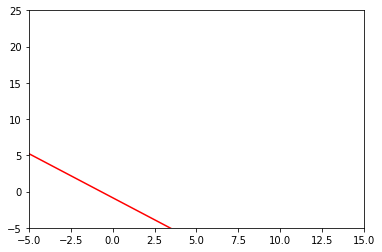

In [267]:
w = np.random.multivariate_normal(mean = m0, cov = S0)

linex = np.linspace(-5, 25, 10000)
liney = w[0] + w[1]*linex

print(w)

plt.plot(linex, liney, 'r')
plt.xlim([-5, 15])
plt.ylim([-5, 25])

Running the code repeatedly, we can see that the linear regression estimator is pretty random, which is what we expect. After all, the data can follow any distribution as far as we're concerned. 

To get a better estimate for $w$ based on our data $(x_{i}, t_{i})$, we can follow the derived formulas for our mean $m_{N}$ and covariance $S_{N}$:

$$\textbf{m}_{N} = \textbf{S}_{N}(\textbf{S}_{0}^{-1}\textbf{m}_{0} + \beta \Phi^T \textbf{t}) = \beta \textbf{S}_{N} \Phi^T \textbf{t}$$

$$\textbf{S}_{N}^{-1} = \textbf{S}_{0}^{-1} + \beta \Phi^T \Phi = \alpha I + \beta \Phi^T \Phi$$

Our $\Phi$ in this case will just be a column of 1s followed by a column of our $x_{i}$'s, while our $\textbf{t}$ is just a vector of our $t_{i}$'s. Also recall our $\beta$ is the variance for our error term, which we assumed to be 2. This choice is arbitrary.

0.8155290924092619 1.8965771584717008
[[0.84051242]
 [1.86421574]]
[[ 0.03744796 -0.00661484]
 [-0.00661484  0.00134798]]


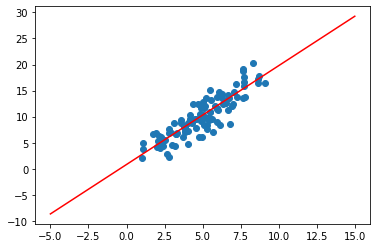

In [269]:
phi = np.hstack((np.ones((numpoints, 1)), x.T))
SN = np.linalg.inv(alpha * np.eye(dim) + beta * np.matmul(phi.T, phi))
mN = beta * np.matmul(SN, np.matmul(phi.T, t.T))

w = np.random.multivariate_normal(mean = mN.reshape(2,), cov = SN)

print(w[0], w[1])
print(mN)
print(SN)
linex = np.linspace(-5, 15, 10000)
liney = w[0] + w[1]*linex

plt.scatter(x, t)
plt.plot(linex, liney, 'r')

Wow! The Bayesian approach fits a linear estimator extremely accurately, though this could be due to the tame data we generated. This can also be repeated for different distributions to observe its behavior. 

Something of note is that the mean of our slope is centered at approximately 2 and the intercept is centered at approximately 0. Furthermore, the covariance matrix is almost the zero matrix, which indicates that the distribution for $w$ is super consistent in picking an intercept of 0 and slope of 2, which matches the way we generated our target values. 

Let's compare this result to a traditional least squares one:

[[0.8502723 ]
 [1.86265895]]


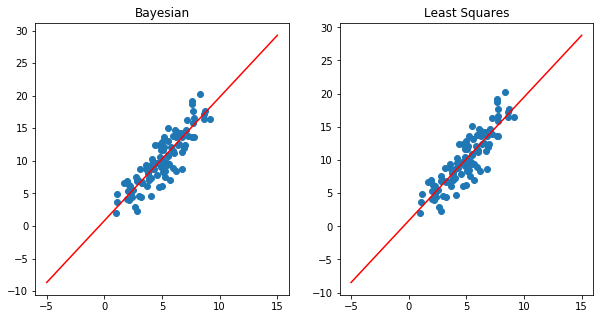

In [270]:
pseudo = np.matmul(np.linalg.inv(np.matmul(phi.T, phi)), phi.T)
wML = np.dot(pseudo, t.T)

print(wML)

linex = np.linspace(-5, 15, 10000)
liney = w[0] + w[1]*linex
lsliney = wML[0] + wML[1]*linex

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].title.set_text("Bayesian")
ax[0].scatter(x, t)
ax[0].plot(linex, liney, 'r')
ax[1].title.set_text("Least Squares")
ax[1].scatter(x, t)
ax[1].plot(linex, lsliney, 'r')

The least squares approximation of our regression line is extremely similar to the Bayesian approach. The coefficients are only off by several thousandths. 

This is true even for different sets of data.

[3.90228679 0.3953444 ]
[[3.80116934 0.39954483]]


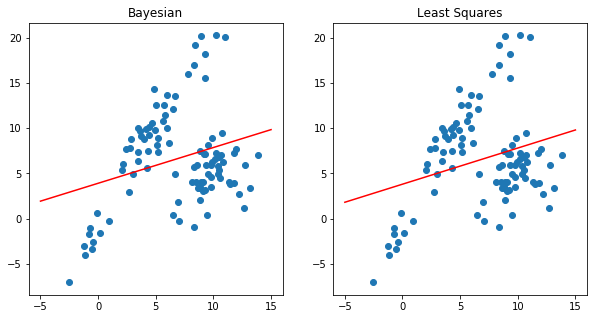

In [299]:
mu1 = 5
mu2 = 10
sigma1 = 3
sigma2 = 2
beta = 2
numx = 50

alpha = 0.5

x1 = np.array([np.random.normal(loc = mu1, scale = sigma1, size = numx)])
eps1 = np.array([np.random.normal(loc = epsmu, scale = beta, size = numx)])
x2 = np.array([np.random.normal(loc = mu2, scale = sigma2, size = numx)])
eps2 = np.array([np.random.normal(loc = epsmu, scale = beta, size = numx)])

x = np.hstack((x1, x2))
t = np.hstack((2 * x1 + eps1, 0.5 * x2 + eps2))

phi = np.hstack((np.ones((numpoints, 1)), x.T))
SN = np.linalg.inv(alpha * np.eye(dim) + beta * np.matmul(phi.T, phi))
mN = beta * np.matmul(SN, np.matmul(phi.T, t.T))

w = np.random.multivariate_normal(mean = mN.reshape(2,), cov = SN)
pseudo = np.matmul(np.linalg.inv(np.matmul(phi.T, phi)), phi.T)
wML = np.dot(pseudo, t.T)

print(w)
print(wML.T)

linex = np.linspace(-5, 15, 10000)
liney = w[0] + w[1]*linex
lsliney = wML[0] + wML[1]*linex

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].title.set_text("Bayesian")
ax[0].scatter(x, t)
ax[0].plot(linex, liney, 'r')
ax[1].title.set_text("Least Squares")
ax[1].scatter(x, t)
ax[1].plot(linex, lsliney, 'r')

This similarity is to be expected, as the isotropic prior for $w$ will yield the error function  
$$ ln(p(\textbf{w}|\textbf{t}) = -\frac{\beta}{2} \sum_{n=1}^{N}(\textbf{t}_{n} - \textbf{w}^T\phi(\textbf{x}_{n}))^2 - \frac{\alpha}{2}\textbf{w}^T\textbf{w} + constants$$

Thus for small $\alpha$, the Bayesian method will resemble the least squares one more and more. Since we chose $\alpha$ to be $0.5$, this is probably why the two are so similar.

To truly see a difference in the two, it may be interesting to choose more extreme $\alpha$ values for our prior.

[1.41709327 0.74653869]
[[5.22416781 0.33750896]]


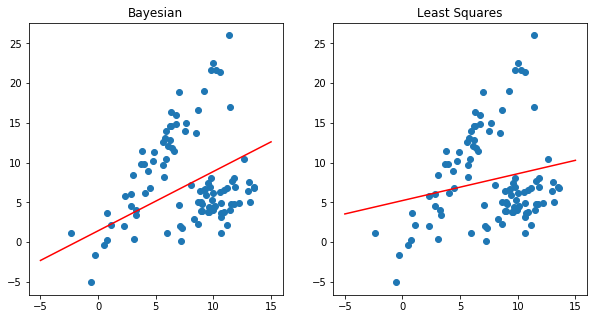

In [300]:
mu1 = 5
mu2 = 10
sigma1 = 3
sigma2 = 2
beta = 2
numx = 50

alpha = 100

x1 = np.array([np.random.normal(loc = mu1, scale = sigma1, size = numx)])
eps1 = np.array([np.random.normal(loc = epsmu, scale = beta, size = numx)])
x2 = np.array([np.random.normal(loc = mu2, scale = sigma2, size = numx)])
eps2 = np.array([np.random.normal(loc = epsmu, scale = beta, size = numx)])

x = np.hstack((x1, x2))
t = np.hstack((2 * x1 + eps1, 0.5 * x2 + eps2))

phi = np.hstack((np.ones((numpoints, 1)), x.T))
SN = np.linalg.inv(alpha * np.eye(dim) + beta * np.matmul(phi.T, phi))
mN = beta * np.matmul(SN, np.matmul(phi.T, t.T))

w = np.random.multivariate_normal(mean = mN.reshape(2,), cov = SN)
pseudo = np.matmul(np.linalg.inv(np.matmul(phi.T, phi)), phi.T)
wML = np.dot(pseudo, t.T)

print(w)
print(wML.T)

linex = np.linspace(-5, 15, 10000)
liney = w[0] + w[1]*linex
lsliney = wML[0] + wML[1]*linex

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].title.set_text("Bayesian")
ax[0].scatter(x, t)
ax[0].plot(linex, liney, 'r')
ax[1].title.set_text("Least Squares")
ax[1].scatter(x, t)
ax[1].plot(linex, lsliney, 'r')

With a very large $\alpha$ like 100, we can now see the regularizing effect of Bayesian linear regression. 

How to explain that the slope of Bayesian is greater even though it should be closer to 0?

# Iterative Updating

### Brute Force Update

The goal of this section is to write an algorithm to update and visualize the Bayesian linear model for each addition of a new data point. There are two ways we can go about this: we either concatenate the new data point to our existing $\Phi$ and $\textbf{t}$ and re-crunch $\textbf{m}_{N}$ and $\textbf{S}_{N}$ or find a clever way to add a term to our existing $\textbf{m}_{N}$ and $\textbf{S}_{N}$ to avoid recalculations, which can get computationally expensive if we increase the dimension of our data.  

Let's first do it the easy way by concatenating our data and recalculating each time.

[0.41369253 2.89079936]
[-0.26617853  2.96192626]
[-4.30250707  2.97366299]
[-4.19583509  3.1243591 ]
[-4.61362991  3.09000033]
[-4.57250799  2.9748075 ]
[-4.57997479  3.1287862 ]
[-4.1167527   2.97892583]
[-4.26297271  2.87854978]
[[-4.0583942   2.86024404]]
[[ 0.03064497 -0.00400643]
 [-0.00400643  0.00094719]]


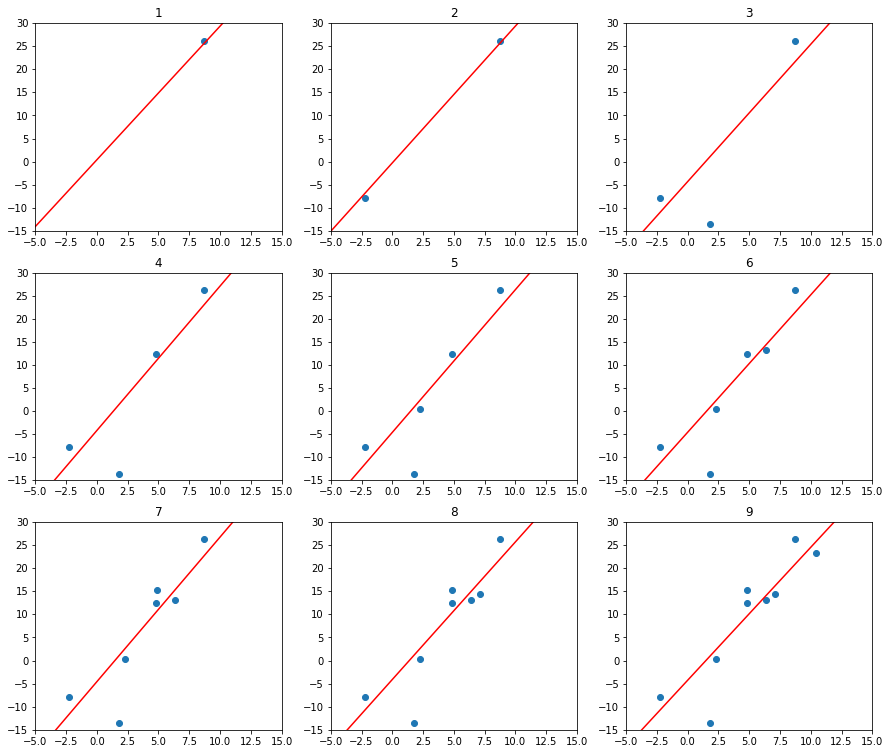

In [382]:
fig, ax = plt.subplots(3,3, figsize=(15,13))
axdim = [(0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)]

dim = 2
mu = 5
sigma = 4
batch = 1

epsmu = 0
beta = 7
alpha = 10

x = np.array([np.random.normal(loc = mu, scale = sigma, size = batch)])
eps = np.array([np.random.normal(loc = epsmu, scale = beta, size = batch)])
t = 2 * x + eps

phi = np.hstack((np.ones((len(x[0]), 1)), x.T))
SN = np.linalg.inv(alpha * np.eye(dim) + beta * np.matmul(phi.T, phi))
mN = beta * np.matmul(SN, np.matmul(phi.T, t.T))

w = np.random.multivariate_normal(mean = mN.reshape(2,), cov = SN)
print(w)
linex = np.linspace(-5, 15, 10000)
liney = w[0] + w[1]*linex

ax[0,0].scatter(x, t)
ax[0,0].set_xlim([-5, 15])
ax[0,0].set_ylim([-15, 30])
ax[0,0].plot(linex, liney, 'r')
ax[0,0].title.set_text("1")

for i in np.arange(8):
    x = np.hstack((x, np.array([np.random.normal(loc = mu, scale = sigma, size = batch)])))
    eps = np.hstack((eps, np.array([np.random.normal(loc = epsmu, scale = beta, size = batch)])))
    t = 2 * x + eps
    
    phi = np.hstack((np.ones((len(x[0]), 1)), x.T))
    SN = np.linalg.inv(alpha * np.eye(dim) + beta * np.matmul(phi.T, phi))
    mN = beta * np.matmul(SN, np.matmul(phi.T, t.T)) 
    
    w = np.random.multivariate_normal(mean = mN.reshape(2,), cov = SN)
    print(w)
    linex = np.linspace(-5, 15, 10000)
    liney = w[0] + w[1]*linex

    ax[axdim[i]].scatter(x, t)
    ax[axdim[i]].set_xlim([-5, 15])
    ax[axdim[i]].set_ylim([-15, 30])
    ax[axdim[i]].plot(linex, liney, 'r')
    ax[axdim[i]].title.set_text(i+2)
    
print(mN.T)
print(SN)

We can observe that the Bayesian regression model starts out with high variance before eventually stabilizing. This is more or less what we expect from an updating model, but it's still pretty cool to visualize. 

changing alpha?

### Clever Update 

Rather than repeatedly recompute the model parameters from scratch each time, we can just add to the previous $\textbf{m}_{N}$ and $\textbf{S}_{N}$. First note that for linear regression with $N+1$ data points, $\Phi$ and $\textbf{t}$ have the forms
$$ \Phi = \begin{bmatrix}
             \Phi_{0}(\textbf{x}_{1}) & \Phi_{1}(\textbf{x}_{1}) \\
             \Phi_{0}(\textbf{x}_{2}) & \Phi_{1}(\textbf{x}_{2}) \\
             \dots & \dots \\
             \Phi_{0}(\textbf{x}_{N}) & \Phi_{1}(\textbf{x}_{N}) \\
             \Phi_{0}(\textbf{x}_{N+1}) & \Phi_{1}(\textbf{x}_{N+1})
          \end{bmatrix}  = 
          \begin{bmatrix}
             1 & \textbf{x}_{1} \\
             1 & \textbf{x}_{2} \\
             \dots & \dots \\
             1 & \textbf{x}_{N} \\
             1 & \textbf{x}_{N+1}
          \end{bmatrix}$$
          
$$    \textbf{t} = \begin{bmatrix} 
                    t_{1} \\
                    t_{2} \\
                    \dots \\
                    t_{N} \\
                    t_{N+1}
                  \end{bmatrix} $$

Thus it can easily be shown that 
$$\textbf{S}_{N+1}^{-1} = \alpha I  + \beta \Phi_{N+1}^T \Phi_{N+1} = \alpha I + \beta 
  \begin{bmatrix}
     \sum_{n=1}^{N+1} \phi_{0}(\textbf{x}_{n})^2 & \sum_{n=1}^{N+1}\phi_{0}(\textbf{x}_{n})\phi_{1}(\textbf{x}_{n}) \\
     \sum_{n=1}^{N+1}\phi_{0}(\textbf{x}_{n})\phi_{1}(\textbf{x}_{n}) & \sum_{n=1}^{N+1} \phi_{1}(\textbf{x}_{n})^2
  \end{bmatrix}
  \\ = \alpha I + \beta ( 
  \begin{bmatrix}
     N & \sum_{n=1}^{N}\textbf{x}_{n} \\
     \sum_{n=1}^{N}\textbf{x}_{n} & \sum_{n=1}^{N} \textbf{x}_{n}^2
  \end{bmatrix} + 
  \begin{bmatrix}
     1 & \textbf{x}_{N+1} \\
     \textbf{x}_{N+1} & \textbf{x}_{N+1}^2
  \end{bmatrix})
  \\ = \alpha I + \beta \Phi_{N}^T\Phi_{N} + \beta(
  \begin{bmatrix}
     1 & \textbf{x}_{N+1} \\
     \textbf{x}_{N+1} & \textbf{x}_{N+1}^2
  \end{bmatrix})$$
  
where $\Phi_{N}$ is the design matrix for our $N^{th}$ iteration.

From this it is obvious that we can simply add a matrix term to our existing $\Phi^T \Phi$.

The same can be done for $m_{N}$, which(after skipping some steps) will yield 
$$\textbf{m}_{N+1} = \beta S_{N+1} \Phi^T \textbf{t} = \beta S_{N+1}\Phi_{N}^T \textbf{t}_{N} + \beta S_{N+1}(
    \begin{bmatrix}
         t_{N+1} \\
         \textbf{x}_{N+1} t_{N+1}
      \end{bmatrix})$$
      
Thus we have a similar additive term that will hopefully reduce the computational cost. This is easily generalized to $m$ new data points. Now let's implement this.

[2.88366224 7.53828944]
[13964.74949335 88336.13123466]
[[ 97756.20014262 618355.87233176]
 [ 97753.64026039 618353.31244953]]


ValueError: cannot reshape array of size 4 into shape (2,)

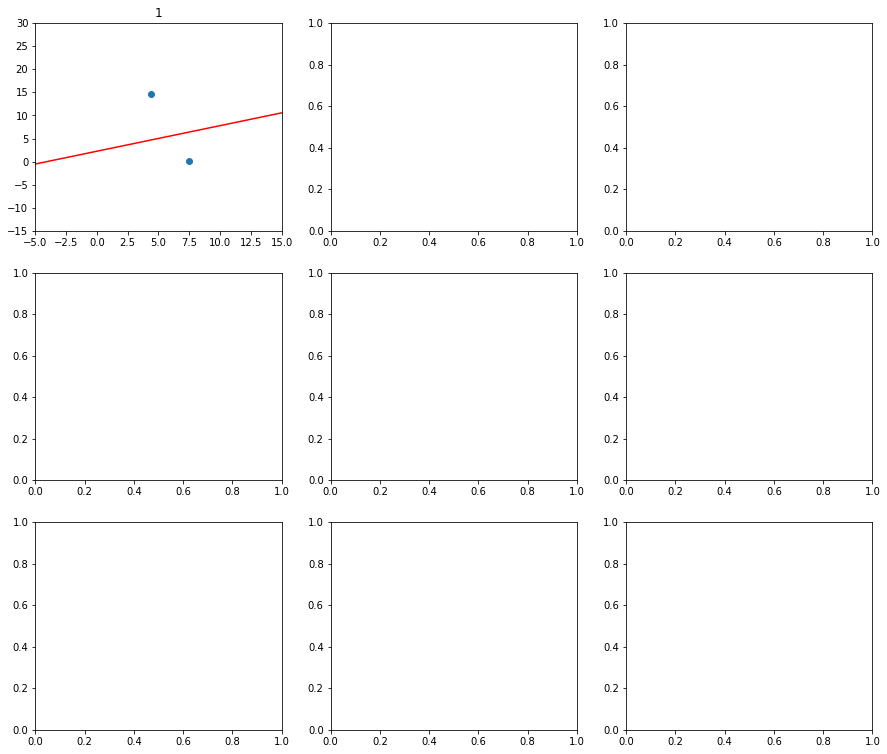

In [405]:
fig, ax = plt.subplots(3,3, figsize=(15,13))
axdim = [(0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)]

dim = 2
mu = 5
sigma = 4
batch = 2

epsmu = 0
beta = 7
alpha = 10

x = np.array([np.random.normal(loc = mu, scale = sigma, size = batch)])
eps = np.array([np.random.normal(loc = epsmu, scale = beta, size = batch)])
t = 2 * x + eps

phi = np.hstack((np.ones((len(x[0]), 1)), x.T))
SN = np.linalg.inv(alpha * np.eye(dim) + beta * np.matmul(phi.T, phi))
mN = beta * np.matmul(SN, np.matmul(phi.T, t.T))

w = np.random.multivariate_normal(mean = mN.reshape(2,), cov = SN)
#print(w)
linex = np.linspace(-5, 15, 10000)
liney = w[0] + w[1]*linex

ax[0,0].scatter(x, t)
ax[0,0].set_xlim([-5, 15])
ax[0,0].set_ylim([-15, 30])
ax[0,0].plot(linex, liney, 'r')
ax[0,0].title.set_text("1")

for i in np.arange(8):
    newx = np.random.normal(loc = mu, scale = sigma, size = batch)
    neweps = np.random.normal(loc = epsmu, scale = beta, size = batch)
    newt = 2 * newx + neweps
    print(newx)
    
    SN = SN + beta * np.array([[1, newx.sum()], [newx.sum(), (newx**2).sum()]])
    print(np.matmul(SN, np.array([newt.sum(), np.matmul(newx, newt.T)])) )
    mN = mN + beta * np.matmul(SN, np.array([newt.sum(), np.matmul(newx, newt.T)])) 
    print(mN)
    
    w = np.random.multivariate_normal(mean = mN.reshape(2,), cov = SN)
    #print(w)
    linex = np.linspace(-5, 15, 10000)
    liney = w[0] + w[1]*linex

    ax[axdim[i]].scatter(x, t)
    ax[axdim[i]].set_xlim([-5, 15])
    ax[axdim[i]].set_ylim([-15, 30])
    ax[axdim[i]].plot(linex, liney, 'r')
    ax[axdim[i]].title.set_text(i+2)
    

In [370]:
(np.array([[1,2,3,4]])**2).sum()


30

In [374]:
newx = np.array([np.random.normal(loc = mu, scale = sigma, size = 2)])
neweps = np.array([np.random.normal(loc = epsmu, scale = beta, size = 2)])
newt = 2 * newx + neweps

In [393]:
print(newx)
print(newt)
print(2*np.array([[1,2,3]]))

[[10.46600728]]
[[34.35501847]]
[[2 4 6]]


In [396]:
np.matmul(SN, np.array([newt.sum(), np.matmul(newx, newt.T)])) 

TypeError: ufunc 'matmul' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [406]:
beta * np.array([[1, newx.sum()], [newx.sum(), (newx**2).sum()]])

array([[  7.        ,  72.95366177],
       [ 72.95366177, 455.9892093 ]])